In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 

In [5]:
df = pd.read_csv('data/twitter_sentiment.csv',header=None,index_col=0)
df

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...
4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...


In [6]:
df = df[[2,3]].reset_index(drop=True)

In [7]:
df

,2,3
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
75677,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,Positive,Today sucked so it’s time to drink wine n play...
75680,Positive,Bought a fraction of Microsoft today. Small wins.


In [8]:
df.columns

Index([2, 3], dtype='int64')

In [9]:
df.columns = ['sentiment','text']

In [10]:
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [12]:
df.isnull().sum() # There are 686 null values in the dataset 

sentiment      0
text         686
dtype: int64

In [13]:
df.sample(10)

,sentiment,text
15591,Negative,fuck you life.
59728,Neutral,Too far connected : FTC eyes Facebook antitrus...
66734,Negative,I can only imagine what a mark-up the vaccine ...
13865,Negative,@NBA2K fix your problem please my god
55527,Irrelevant,Them nighas on call of duty gone to hot.ii get...
38277,Positive,Dude that whole chat is amazing... Glad @PlayH...
11793,Negative,RhandlerR how did we start this generation wit...
49828,Irrelevant,Career club trophies :. Messi : 36. Ronaldo : ...
34488,Negative,So tired of hearing about fortnite & Roblox .
10938,Negative,Bruh. The sony reveal was pointless did we get...


In [14]:
df.dropna(inplace=True) # dropping null values 

In [15]:
# checking the length of the tweets -
df['text'].apply(len).value_counts() # Many tweets length are small

text
70     611
3      566
2      500
36     485
57     480
      ... 
418      1
434      1
394      1
427      1
374      1
Name: count, Length: 403, dtype: int64

In [16]:
sum(df['text'].apply(len)>5), sum(df['text'].apply(len)<=5)

(72883, 2113)

In [17]:
print(df.shape)
df = df[df['text'].apply(len)>5]
print(df.shape) # No. of tweets reduced.

(74996, 2)
(72883, 2)


In [18]:
df['sentiment'].value_counts()

sentiment
Negative      22020
Positive      20186
Neutral       17899
Irrelevant    12778
Name: count, dtype: int64

In [19]:
df


,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
75677,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,Positive,Today sucked so it’s time to drink wine n play...
75680,Positive,Bought a fraction of Microsoft today. Small wins.


In [20]:
# Preprocessing step - 
import preprocess_kgptalkie as ps 
df.columns

Index(['sentiment', 'text'], dtype='object')

In [21]:
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [22]:
df = ps.get_basic_features(df)
df

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,43,11,3.909091,6,0,0,1,0
1,Positive,I am coming to the borders and I will kill you...,40,12,3.333333,6,0,0,1,2
2,Positive,im getting on borderlands and i will kill you ...,41,10,4.100000,5,0,0,1,0
3,Positive,im coming on borderlands and i will murder you...,42,10,4.200000,5,0,0,1,0
4,Positive,im getting on borderlands 2 and i will murder ...,46,12,3.833333,6,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
75677,Irrelevant,⭐️ Toronto is the arts and culture capital of ...,235,47,5.000000,20,0,0,6,1
75678,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,202,46,4.391304,15,0,0,4,10
75679,Positive,Today sucked so it’s time to drink wine n play...,97,24,4.041667,9,0,0,1,1
75680,Positive,Bought a fraction of Microsoft today. Small wins.,42,8,5.250000,2,0,0,2,0


In [23]:
df.columns # More features are introduced

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

In [24]:
df.head()

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,43,11,3.909091,6,0,0,1,0
1,Positive,I am coming to the borders and I will kill you...,40,12,3.333333,6,0,0,1,2
2,Positive,im getting on borderlands and i will kill you ...,41,10,4.100000,5,0,0,1,0
3,Positive,im coming on borderlands and i will murder you...,42,10,4.200000,5,0,0,1,0
4,Positive,im getting on borderlands 2 and i will murder ...,46,12,3.833333,6,0,0,2,0


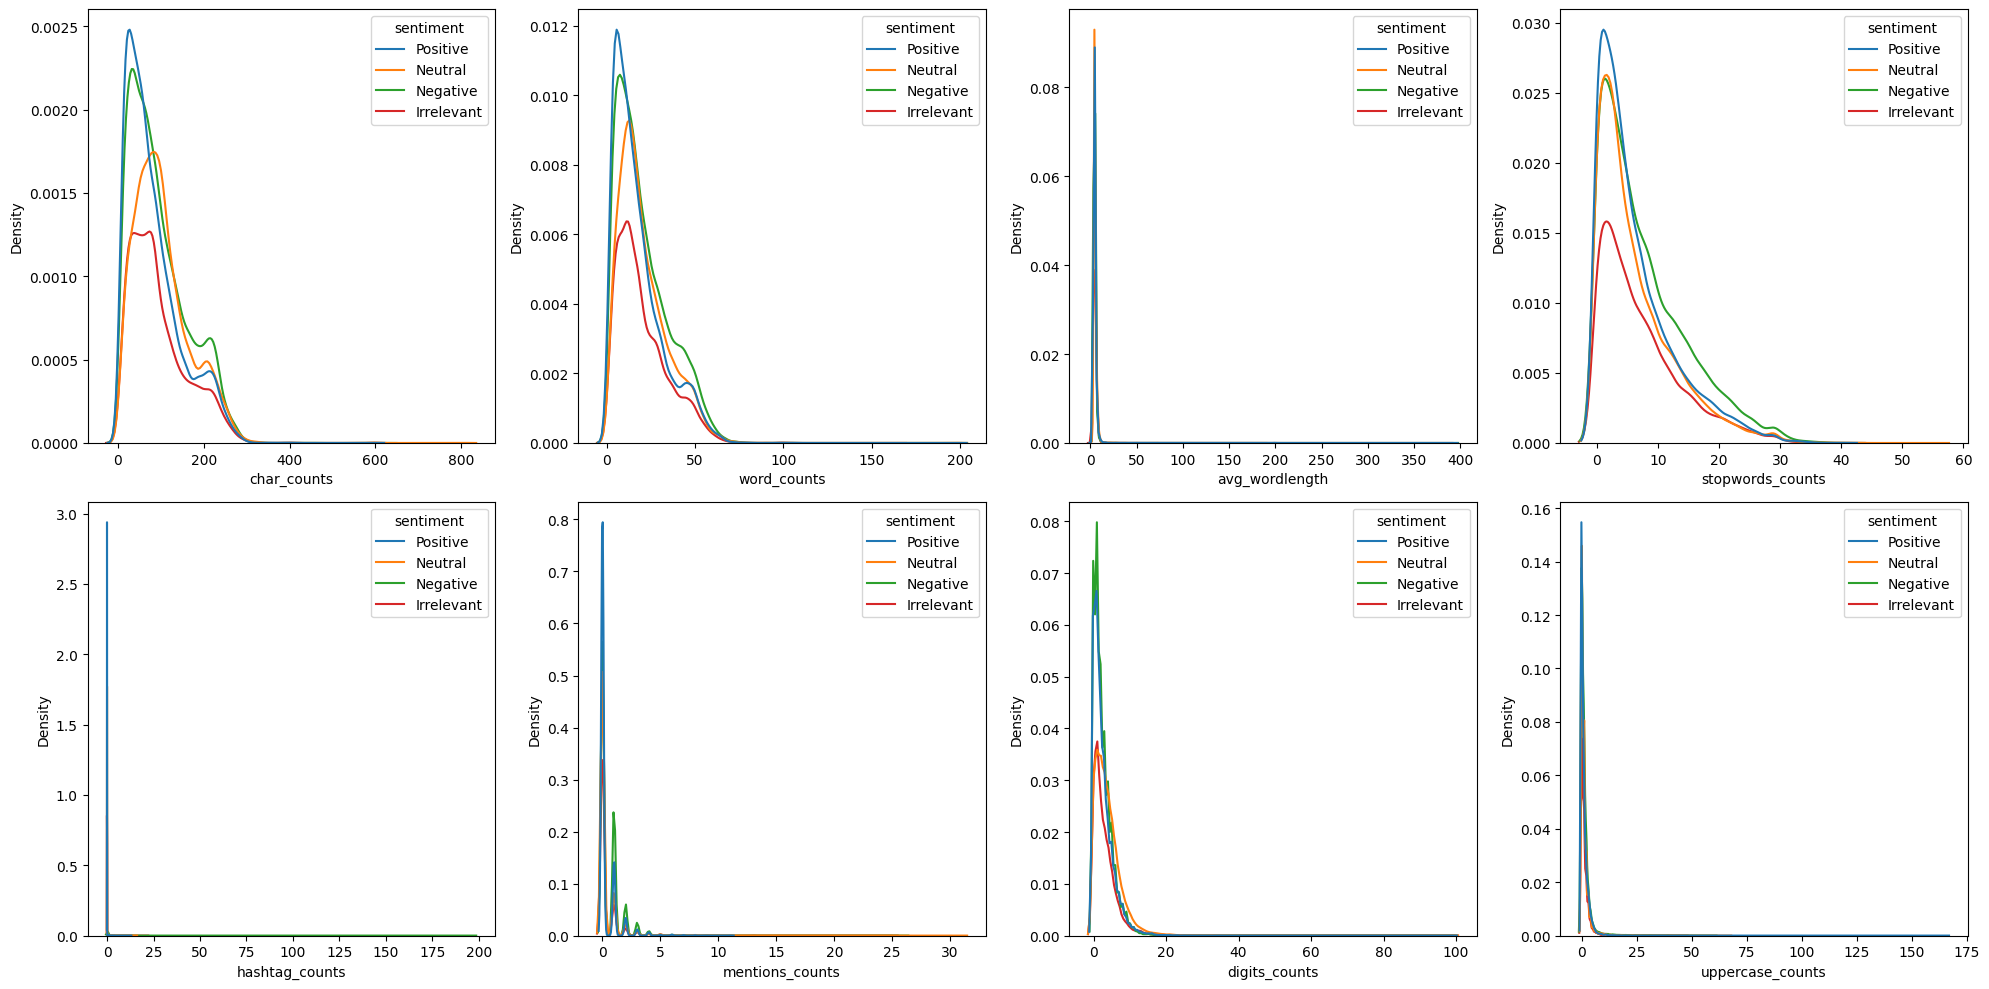

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
num_cols = df.select_dtypes(include='number').columns

for index,col in enumerate(num_cols):
    plt.subplot(2,4,index+1)
    sns.kdeplot(data=df,x=col,hue="sentiment")

plt.tight_layout()
plt.show()


<Axes: ylabel='count'>

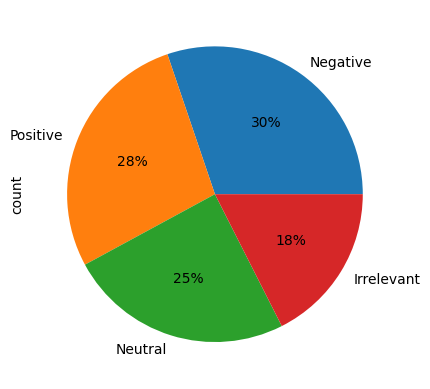

In [30]:
df['sentiment'].value_counts().plot(kind='pie',autopct="%1.0f%%")

In [31]:
# WordCloud  visualization -
!pip install WordCloud

     ---------------------------------------- 0.0/300.0 kB ? eta -:--:--
     -------------------------------------- 300.0/300.0 kB 6.2 MB/s eta 0:00:00


In [32]:
from wordcloud import WordCloud , STOPWORDS
stopwords = set(STOPWORDS)


In [33]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

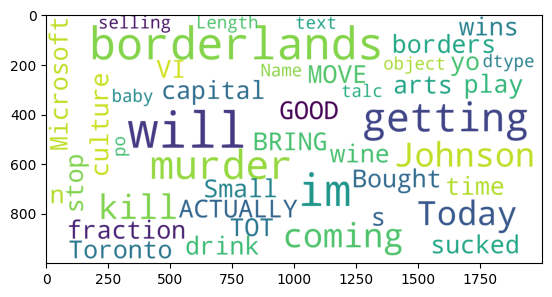

In [35]:
wordcloud = WordCloud(background_color='white',stopwords=stopwords,
                      max_words=300,max_font_size=40,scale=5).generate(str(df['text']))
plt.imshow(wordcloud)

In [36]:
df['text'] = df['text'].apply(lambda x:x.lower())
df['text'] = df['text'].apply(lambda x:ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x:ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))




In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df['text'],df['sentiment'],test_size=0.2,random_state=0)

In [39]:
X_train.shape , X_test.shape

((58306,), (14577,))

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
clf = Pipeline([('tfid',TfidfVectorizer()),
                ('rfc',RandomForestClassifier(n_jobs=-1))])

clf.fit(X_train,Y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [43]:
from sklearn.metrics import classification_report
predictions = clf.predict(X_test)
y_pred = clf.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.98      0.86      0.91      2561
    Negative       0.92      0.96      0.94      4481
     Neutral       0.92      0.91      0.92      3553
    Positive       0.90      0.94      0.92      3982

    accuracy                           0.92     14577
   macro avg       0.93      0.92      0.92     14577
weighted avg       0.93      0.92      0.92     14577



In [44]:
import pickle
pickle.dump(clf,open('twitter_sentiment.pkl','wb'))

In [45]:
clf.predict(['let me not upset you'])

array(['Negative'], dtype=object)